<a href="https://colab.research.google.com/github/shikashyam/BigDataSystemsCoursework/blob/main/GeneratingData_AnalyzeNowcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install boto3

     |████████████████████████████████| 132 kB 4.3 MB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 8.5 MB 20.2 MB/s 
     |████████████████████████████████| 138 kB 69.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import boto3
from botocore.handlers import disable_signing
resource = boto3.resource('s3')
resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket=resource.Bucket('sevir')

In [ ]:
bucket.download_file('data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5','/content/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5')

In [ ]:
bucket.download_file('data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5','/content/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5')

In [ ]:
bucket.download_file('data/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5','/content/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5')

In [ ]:
bucket.download_file('data/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5','/content/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5')

In [ ]:
bucket.download_file('data/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5','/content/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5')

In [ ]:
cd /content

/content


In [ ]:
ls

CATALOG.csv  lght/                    sample_data/         vis/
data/        make_nowcast_dataset.py  synrad_generator.py
ir069/       make_synrad_dataset.py   utils.py
ir107/       nowcast_generator.py     vil/


In [ ]:
!python make_synrad_dataset.py --sevir_data '/content/' --sevir_catalog 'CATALOG.csv' --output_location '/content/data/interim/'

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-02-18 21:22:11,231 - __main__ - INFO - making final data set from raw data
2022-02-18 21:22:11,808 - __main__ - INFO - Reading/writing training data to /content/data/interim//synrad_training.h5
2022-02-18 21:22:11,808 - __main__ - INFO - Reading/writing testing data to /content/data/interim//synrad_testing.h5
2022-02-18 21:22:11,808 - __main__ - INFO - Gathering chunk 0/20:
100% 3/3 [00:01<00:00,  2.48it/s]
2022-02-18 21:22:13,081 - __main__ - INFO - Gathering chunk 1/20:
100% 3/3 [00:01<00:00,  2.79it/s]
2022-02-18 21:22:14,204 - __main__ - INFO - Gathering chunk 2/20:
100% 3/3 [00:01<00:00,  2.75it/s]
2022-02-18 21:22:15,338 - __main__ - INFO - Gathering chunk 3/20:
100% 3/3 [00:01<00:00,  2.78it/s]
2022-02-18 21:22:16,465 - __main__ - INFO - Gathering chunk 4/20:
100% 3/3 [00:01<00:00,  2.9

In [ ]:
!python make_nowcast_dataset.py --sevir_data '/content/' --sevir_catalog 'CATALOG.csv' --output_location '/content/data/interim/'

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-02-18 21:23:48,947 - __main__ - INFO - making final data set from raw data
2022-02-18 21:23:49,468 - __main__ - INFO - Reading/writing training data to /content/data/interim//nowcast_training.h5
2022-02-18 21:23:49,468 - __main__ - INFO - Reading/writing testing data to /content/data/interim//nowcast_testing.h5
2022-02-18 21:23:49,469 - __main__ - INFO - Gathering chunk 0/10:
100% 1/1 [00:01<00:00,  1.32s/it]
2022-02-18 21:23:51,204 - __main__ - INFO - Gathering chunk 1/10:
100% 1/1 [00:00<00:00,  1.24it/s]
2022-02-18 21:23:52,436 - __main__ - INFO - Gathering chunk 2/10:
100% 1/1 [00:00<00:00,  1.11it/s]
2022-02-18 21:23:53,696 - __main__ - INFO - Gathering chunk 3/10:
100% 1/1 [00:00<00:00,  1.65it/s]
2022-02-18 21:23:54,825 - __main__ - INFO - Gathering chunk 4/10:
100% 1/1 [00:00<00:00,  1

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/neurips-2020-sevir-master

/content/gdrive/MyDrive/neurips-2020-sevir-master


In [ ]:
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import sys
sys.path.append('../src/')
import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import pandas as pd

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Load pretrained nowcasting models
mse_file  = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/mse_model.h5'
mse_model = tf.keras.models.load_model(mse_file,compile=False,custom_objects={"tf": tf})

style_file = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/style_model.h5'
style_model = tf.keras.models.load_model(style_file,compile=False,custom_objects={"tf": tf})

mse_style_file = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/mse_and_style.h5'
mse_style_model = tf.keras.models.load_model(mse_style_file,compile=False,custom_objects={"tf": tf})

gan_file = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/gan_generator.h5'
gan_model = tf.keras.models.load_model(gan_file,compile=False,custom_objects={"tf": tf})

In [ ]:
cd /content/gdrive/MyDrive/neurips-2020-sevir-master/src/readers

/content/gdrive/MyDrive/neurips-2020-sevir-master/src/readers


In [ ]:
!python nowcast_reader.py

In [ ]:
# Load a part of the test dataset
from nowcast_reader import read_data
x_test,y_test = read_data('/content/data/interim/nowcast_testing.h5',end=50)

In [ ]:
## 
# Functions for plotting results
##

norm = {'scale':47.54,'shift':33.44}
hmf_colors = np.array( [
    [82,82,82], 
    [252,141,89],
    [255,255,191],
    [145,191,219]
])/255

# Model that implements persistence forecast that just repeasts last frame of input
class persistence:
    def predict(self,x_test):
        return np.tile(x_test[:,:,:,-1:],[1,1,1,12])

def plot_hit_miss_fa(ax,y_true,y_pred,thres):
    mask = np.zeros_like(y_true)
    mask[np.logical_and(y_true>=thres,y_pred>=thres)]=4
    mask[np.logical_and(y_true>=thres,y_pred<thres)]=3
    mask[np.logical_and(y_true<thres,y_pred>=thres)]=2
    mask[np.logical_and(y_true<thres,y_pred<thres)]=1
    cmap=ListedColormap(hmf_colors)
    ax.imshow(mask,cmap=cmap)


def visualize_result(models,x_test,y_test,idx,ax,labels):
    fs=10
    cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0],
                           'norm':get_cmap(s,encoded=True)[1],
                           'vmin':get_cmap(s,encoded=True)[2],
                           'vmax':get_cmap(s,encoded=True)[3]}
    for i in range(1,13,3):
        xt = x_test[idx,:,:,i]*norm['scale']+norm['shift']
        ax[(i-1)//3][0].imshow(xt,**cmap_dict('vil'))
    ax[0][0].set_title('Inputs',fontsize=fs)
    
    pers = persistence().predict(x_test[idx:idx+1])
    pers = pers*norm['scale']+norm['shift']
    x_test = x_test[idx:idx+1]
    y_test = y_test[idx:idx+1]*norm['scale']+norm['shift']
    y_preds=[]
    for i,m in enumerate(models):
        yp = m.predict(x_test)
        if isinstance(yp,(list,)):
            yp=yp[0]
        y_preds.append(yp*norm['scale']+norm['shift'])
    
    for i in range(0,12,3):
        ax[i//3][2].imshow(y_test[0,:,:,i],**cmap_dict('vil'))
    ax[0][2].set_title('Target',fontsize=fs)
    
    # Plot Persistence
    for i in range(0,12,3):
        plot_hit_miss_fa(ax[i//3][4],y_test[0,:,:,i],pers[0,:,:,i],74)
    ax[0][4].set_title('Persistence\nScores',fontsize=fs)
    
    for k,m in enumerate(models):
        for i in range(0,12,3):
            ax[i//3][5+2*k].imshow(y_preds[k][0,:,:,i],**cmap_dict('vil'))
            plot_hit_miss_fa(ax[i//3][5+2*k+1],y_test[0,:,:,i],y_preds[k][0,:,:,i],74)

        ax[0][5+2*k].set_title(labels[k],fontsize=fs)
        ax[0][5+2*k+1].set_title(labels[k]+'\nScores',fontsize=fs)
        
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].xaxis.set_ticks([])
            ax[j][i].yaxis.set_ticks([])
    for i in range(4):
        ax[i][1].set_visible(False)
    for i in range(4):
        ax[i][3].set_visible(False)
    ax[0][0].set_ylabel('-45 Minutes')
    ax[1][0].set_ylabel('-30 Minutes')
    ax[2][0].set_ylabel('-15 Minutes')
    ax[3][0].set_ylabel('  0 Minutes')
    ax[0][2].set_ylabel('+15 Minutes')
    ax[1][2].set_ylabel('+30 Minutes')
    ax[2][2].set_ylabel('+45 Minutes')
    ax[3][2].set_ylabel('+60 Minutes')
    
    legend_elements = [Patch(facecolor=hmf_colors[1], edgecolor='k', label='False Alarm'),
                   Patch(facecolor=hmf_colors[2], edgecolor='k', label='Miss'),
                   Patch(facecolor=hmf_colors[3], edgecolor='k', label='Hit')]
    ax[-1][-1].legend(handles=legend_elements, loc='lower right', bbox_to_anchor= (-5.4, -.35), 
                           ncol=5, borderaxespad=0, frameon=False, fontsize='16')
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    

In [ ]:
cd /content/gdrive/MyDrive/neurips-2020-sevir-master/src/display

/content/gdrive/MyDrive/neurips-2020-sevir-master/src/display


In [ ]:
!python display.py

In [ ]:
from display import get_cmap

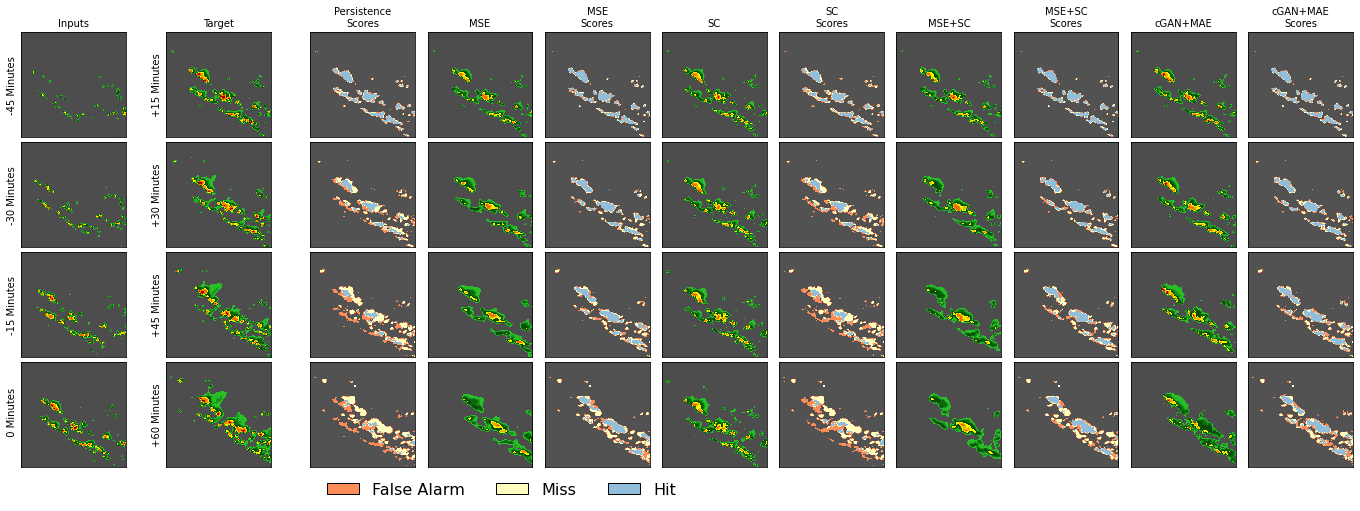

In [ ]:
idx=25 # adjust this to pick a case
fig,ax = plt.subplots(4,13,figsize=(24,8), gridspec_kw={'width_ratios': [1,.2,1,.2,1,1,1,1,1,1,1,1,1]})
visualize_result([mse_model,style_model,mse_style_model,gan_model],x_test,y_test,idx,ax,labels=['MSE','SC','MSE+SC','cGAN+MAE'])

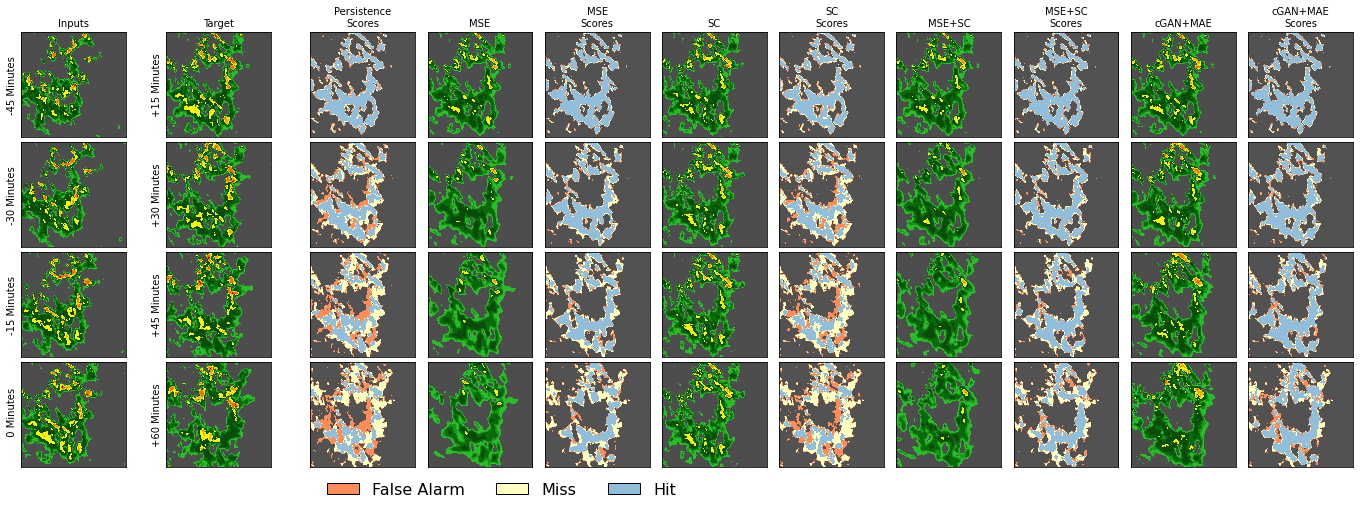

In [ ]:
idx=45 # adjust this to pick a case
fig,ax = plt.subplots(4,13,figsize=(24,8), gridspec_kw={'width_ratios': [1,.2,1,.2,1,1,1,1,1,1,1,1,1]})
visualize_result([mse_model,style_model,mse_style_model,gan_model],x_test,y_test,idx,ax,labels=['MSE','SC','MSE+SC','cGAN+MAE'])

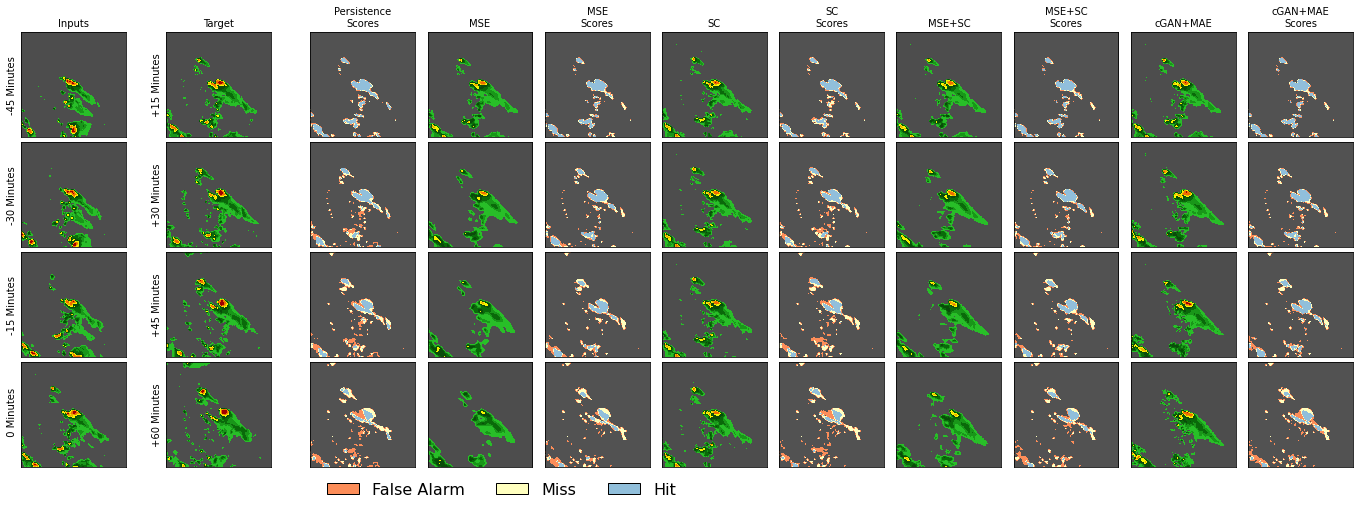

In [ ]:
idx=32 # adjust this to pick a case
fig,ax = plt.subplots(4,13,figsize=(24,8), gridspec_kw={'width_ratios': [1,.2,1,.2,1,1,1,1,1,1,1,1,1]})
visualize_result([mse_model,style_model,mse_style_model,gan_model],x_test,y_test,idx,ax,labels=['MSE','SC','MSE+SC','cGAN+MAE'])

#Synrad Notebook below

In [ ]:
# Read the metrics output during training
log_files= {
    'mse':'/content/gdrive/MyDrive/neurips-2020-sevir-master/logs/sample-mse/metrics.csv',
    'mse+vgg':'/content/gdrive/MyDrive/neurips-2020-sevir-master/logs/sample-mse-vgg/metrics.csv',
    'gan':'/content/gdrive/MyDrive/neurips-2020-sevir-master/logs/sample-gan-mae/metrics.csv'
}
metrics={ k:pd.read_csv(v) for k,v in log_files.items()}

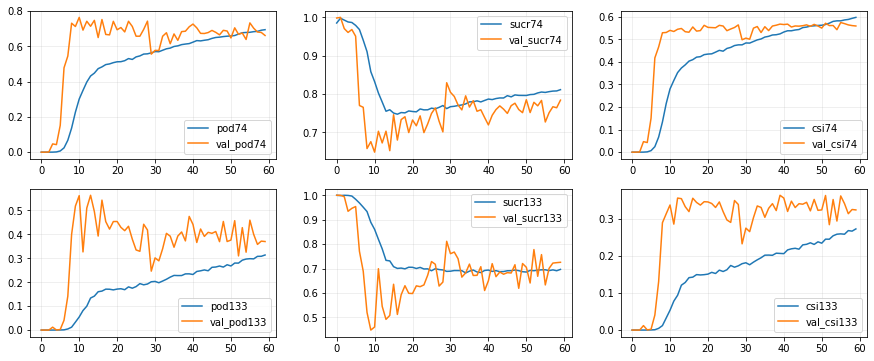

In [ ]:
# MSE
fig,ax=plt.subplots(2,3,figsize=(15,6))
def plot_metrics_row(df,metric_names,ax):
    for k,m in enumerate(metric_names):
        df[[m,'val_'+m]].plot(ax=ax[k])
        ax[k].grid(True,alpha=.25)

plot_metrics_row(metrics['mse'],['pod74','sucr74','csi74'],ax[0])
plot_metrics_row(metrics['mse'],['pod133','sucr133','csi133'],ax[1])

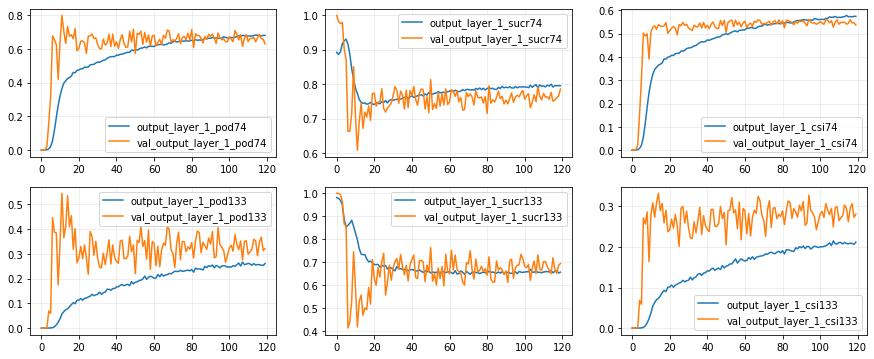

In [ ]:
# mse+mse
fig,ax=plt.subplots(2,3,figsize=(15,6))
def plot_metrics_row(df,metric_names,ax):
    for k,m in enumerate(metric_names):
        df[[m,'val_'+m]].plot(ax=ax[k])
        ax[k].grid(True,alpha=.25)

plot_metrics_row(metrics['mse+vgg'],['output_layer_1_pod74','output_layer_1_sucr74','output_layer_1_csi74'],ax[0])
plot_metrics_row(metrics['mse+vgg'],['output_layer_1_pod133','output_layer_1_sucr133','output_layer_1_csi133'],ax[1])

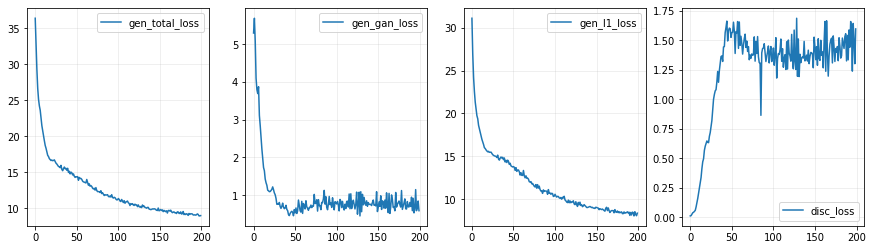

In [ ]:
# gan
fig,ax=plt.subplots(1,4,figsize=(15,4))
def plot_metrics_row(df,metrics,ax):
    for k,m in enumerate(metrics):
        df[[m]].plot(ax=ax[k])
        ax[k].grid(True,alpha=.25)

plot_metrics_row(metrics['gan'],['gen_total_loss', 'gen_gan_loss', 'gen_l1_loss', 'disc_loss'],ax)

In [ ]:
# Load weights from best model on val set
mse_weights_file = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/mse_weights.h5'
mse_model = tf.keras.models.load_model(mse_weights_file,compile=False,custom_objects={"tf": tf})

mse_vgg_weights_file = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/mse_vgg_weights.h5'
mse_vgg_model = tf.keras.models.load_model(mse_vgg_weights_file,compile=False,custom_objects={"tf": tf})

gan_weights_file = '/content/gdrive/MyDrive/neurips-2020-sevir-master/models/gan_mae_weights.h5'
gan_model = tf.keras.models.load_model(gan_weights_file,compile=False,custom_objects={"tf": tf})

/usr/local/lib/python3.7/dist-packages/keras/layers/core/lambda_layer.py:305: UserWarning: models.synrad_unet is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')
/usr/local/lib/python3.7/dist-packages/keras/layers/core/lambda_layer.py:305: UserWarning: models.synrad_gan is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')


In [ ]:
!python /content/gdrive/MyDrive/neurips-2020-sevir-master/src/readers/synrad_reader.py

In [ ]:
cd /content/gdrive/MyDrive/neurips-2020-sevir-master/src/readers/

/content/gdrive/MyDrive/neurips-2020-sevir-master/src/readers


In [ ]:
# Load a part of the test dataset
from synrad_reader import read_data
x_test,y_test = read_data('/content/data/interim/synrad_testing.h5',end=1000)

In [ ]:
# Run model on test set
def run_synrad(model,x_test,batch_size=32):
    return model.predict([x_test[k] for k in ['ir069','ir107','lght']],batch_size=batch_size)
y_pred_mse     = run_synrad(mse_model,x_test)
y_pred_mse_vgg = run_synrad(mse_vgg_model,x_test)
y_pred_gan     = run_synrad(gan_model,x_test)

In [ ]:
!python /content/gdrive/MyDrive/neurips-2020-sevir-master/src/display/display.py

In [ ]:
cd /content/gdrive/MyDrive/neurips-2020-sevir-master/src/display/

/content/gdrive/MyDrive/neurips-2020-sevir-master/src/display


In [ ]:
# Plot using default cmap
from display import get_cmap
def visualize_result(y_test,y_preds,idx,ax):
    cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0], 'norm':get_cmap(s,encoded=True)[1],
                           'vmin':get_cmap(s,encoded=True)[2], 'vmax':get_cmap(s,encoded=True)[3]}
    ax[0].imshow(x_test['ir069'][idx,:,:,0],**cmap_dict('ir069'))
    ax[1].imshow(x_test['ir107'][idx,:,:,0],**cmap_dict('ir107'))
    ax[2].imshow(x_test['lght'][idx,:,:,0],cmap='hot',vmin=0,vmax=10)
    ax[3].imshow(y_test['vil'][idx,:,:,0],**cmap_dict('vil'))
    for k in range(len(y_preds)):
        if isinstance(y_preds[k],(list,)):
            yp=y_preds[k][0]
        else:
            yp=y_preds[k]
        ax[4+k].imshow(yp[idx,:,:,0],**cmap_dict('vil'))
    for i in range(len(ax)):
        ax[i].xaxis.set_ticks([])
        ax[i].yaxis.set_ticks([])
    

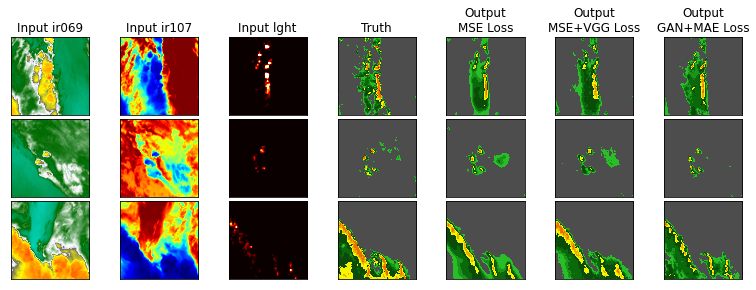

In [ ]:
test_idx = [123,456,789]
N=len(test_idx)
fig,ax = plt.subplots(N,7,figsize=(12,4))
for k,i in enumerate(test_idx):
    visualize_result(y_test,[y_pred_mse,y_pred_mse_vgg,y_pred_gan], i, ax[k] )

ax[0][0].set_title('Input ir069')
ax[0][1].set_title('Input ir107')
ax[0][2].set_title('Input lght')
ax[0][3].set_title('Truth')
ax[0][4].set_title('Output\nMSE Loss')
ax[0][5].set_title('Output\nMSE+VGG Loss')
ax[0][6].set_title('Output\nGAN+MAE Loss')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05,
                    wspace=0.35)
